In [215]:
from sklearn.datasets import make_circles
X,y = make_circles(noise=0.03, n_samples=1500, random_state=42)
for i in range(0,5):
    print(f"X is: {X[i]}, y is: {y[i]}")

X is: [-0.79263753  0.06017107], y is: 1
X is: [ 0.35609331 -0.68671084], y is: 1
X is: [-0.88213004 -0.36314313], y is: 0
X is: [-0.95374551 -0.27922768], y is: 0
X is: [-0.84887933 -0.61602384], y is: 0


In [216]:
import pandas as pd
dataset = pd.DataFrame({
    'X1' : X[ : , 0],
    'X2' : X[ : , 1],
    'target' : y
})

dataset.head(n=10)

,X1,X2,target
0,-0.792638,0.060171,1
1,0.356093,-0.686711,1
2,-0.882130,-0.363143,0
3,-0.953746,-0.279228,0
4,-0.848879,-0.616024,0
5,0.460185,0.640325,1
6,-0.679288,0.391073,1
7,0.969978,-0.046081,0
8,-0.273319,-0.751329,1
9,-0.547282,0.827068,0


In [217]:
dataset.shape

(1500, 3)

In [218]:
print(dataset[dataset['target']==0].count())
print(dataset[dataset['target']==1].count())

X1        750
X2        750
target    750
dtype: int64
X1        750
X2        750
target    750
dtype: int64


In [219]:
print(dataset.iloc[ : , 0])

0      -0.792638
1       0.356093
2      -0.882130
3      -0.953746
4      -0.848879
          ...   
1495   -0.799277
1496   -0.073345
1497    0.479348
1498    0.708064
1499   -0.741373
Name: X1, Length: 1500, dtype: float64


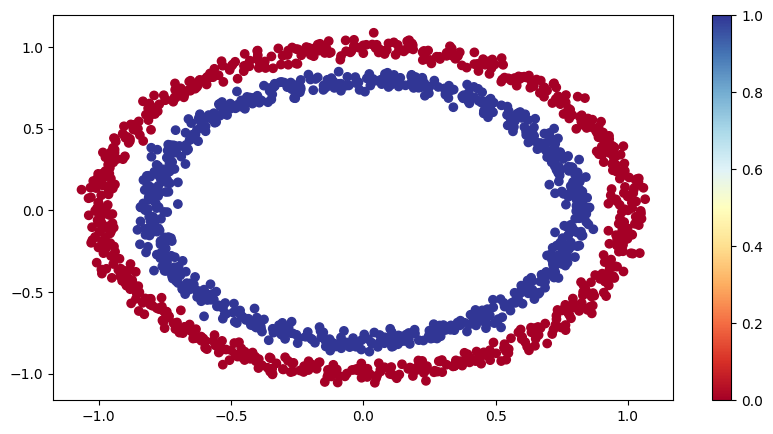

In [220]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(x=dataset.iloc[:, 0], 
            y=dataset.iloc[:, 1], 
            c=dataset.iloc[:, 2], 
            cmap=plt.cm.RdYlBu)

plt.colorbar()  # Add color bar to show mapping of color to values
plt.show()


In [221]:
X,Y= dataset.iloc[ : , 0:2], dataset.iloc[ : ,2]
print(X.shape)
print(Y.shape)

(1500, 2)
(1500,)


In [222]:
import torch
from  sklearn.model_selection import train_test_split

In [223]:
X = torch.from_numpy(X.values).type(torch.float)
Y = torch.from_numpy(Y.values).type(torch.float)
print(X)
print(Y)

tensor([[-0.7926,  0.0602],
        [ 0.3561, -0.6867],
        [-0.8821, -0.3631],
        ...,
        [ 0.4793,  0.6268],
        [ 0.7081, -0.2695],
        [-0.7414, -0.0106]])
tensor([1., 1., 0.,  ..., 1., 1., 1.])


In [224]:
print(X.ndim)
print(X.shape)

2
torch.Size([1500, 2])


In [225]:
print(Y.ndim)
print(Y.shape)

1
torch.Size([1500])


In [226]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [227]:
print(X_train.ndim)
print(X_train.shape)
print(X_test.ndim)
print(X_test.shape)

2
torch.Size([1200, 2])
2
torch.Size([300, 2])


In [228]:
print(Y_train.ndim)
print(Y_train.shape)
print(Y_test.ndim)
print(Y_test.shape)

1
torch.Size([1200])
1
torch.Size([300])


In [229]:
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [230]:
X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)


In [231]:
from torch import nn
class CircleClassification(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_cc = CircleClassification().to(device)
print(model_cc)


CircleClassification(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [232]:
loss_func=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model_cc.parameters(), lr=0.1)

In [233]:
def calc_accuracy(y_test, y_pred):
    correct=torch.eq(y_test, y_pred).sum().item()
    return correct/len(y_pred)*100

In [234]:
#testing model 
model_cc.eval()
with torch.inference_mode():
    preds = model_cc(X_test[0:5, : ]).squeeze()
    logits = torch.sigmoid(preds)
    rounded = torch.round(logits)


for i in range(5):
    print(f"Input: {X_test[i]}, Actual: {Y_test[i]}, Val: {preds[i]}, Logit: {logits[i]}, Prediction: {rounded[i]}")

Input: tensor([-0.6418,  0.7743]), Actual: 0.0, Val: 0.01425231248140335, Logit: 0.5035629868507385, Prediction: 1.0
Input: tensor([ 0.6489, -0.8289]), Actual: 0.0, Val: 0.009891971945762634, Logit: 0.502472996711731, Prediction: 1.0
Input: tensor([-0.7948,  0.6236]), Actual: 0.0, Val: 0.012958280742168427, Logit: 0.5032395124435425, Prediction: 1.0
Input: tensor([0.5877, 0.8097]), Actual: 0.0, Val: 0.027160227298736572, Logit: 0.5067896246910095, Prediction: 1.0
Input: tensor([-0.3039, -0.9712]), Actual: 0.0, Val: 0.04122408479452133, Logit: 0.5103045701980591, Prediction: 1.0


In [235]:
torch.manual_seed(42)
epochs = 1000

epoch_count=[]
train_loss_vals = []
test_loss_vals = []

for epoch in range(epochs):
    #model_cc.train()
   
    prediction=model_cc(X_train).squeeze()
    loss_train=loss_func(prediction, Y_train)
    logits=torch.round(torch.sigmoid(prediction))
    train_acc=calc_accuracy(Y_train, logits)
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    model_cc.eval()
    with torch.inference_mode():
        preds = (model_cc(X_test)).squeeze()
        loss_test = loss_func(preds, Y_test)
        ylogits=torch.round(torch.sigmoid(preds))
        test_acc = calc_accuracy(Y_test,ylogits)
        if epoch%100 == 0 or epoch == 999:
            epoch_count.append(epoch)
            train_loss_vals.append(loss_train)
            test_loss_vals.append(loss_test)
            print(f"Epoch: {epoch}, Train_Loss: {loss_train:.5f}, Train_acc: {train_acc:.2f}%, Test_Loss: {loss_test:.5f}, Test_acc: {test_acc:.2f}%")
        



Epoch: 0, Train_Loss: 0.69285, Train_acc: 50.83%, Test_Loss: 0.69339, Test_acc: 46.67%
Epoch: 100, Train_Loss: 0.69117, Train_acc: 50.92%, Test_Loss: 0.69157, Test_acc: 47.00%
Epoch: 200, Train_Loss: 0.68986, Train_acc: 74.00%, Test_Loss: 0.68961, Test_acc: 72.33%
Epoch: 300, Train_Loss: 0.68813, Train_acc: 66.50%, Test_Loss: 0.68713, Test_acc: 66.00%
Epoch: 400, Train_Loss: 0.68570, Train_acc: 60.83%, Test_Loss: 0.68375, Test_acc: 62.00%
Epoch: 500, Train_Loss: 0.68201, Train_acc: 57.83%, Test_Loss: 0.67864, Test_acc: 61.67%
Epoch: 600, Train_Loss: 0.67695, Train_acc: 56.33%, Test_Loss: 0.67183, Test_acc: 61.67%
Epoch: 700, Train_Loss: 0.66967, Train_acc: 57.33%, Test_Loss: 0.66217, Test_acc: 64.00%
Epoch: 800, Train_Loss: 0.65762, Train_acc: 66.25%, Test_Loss: 0.64738, Test_acc: 69.67%
Epoch: 900, Train_Loss: 0.63810, Train_acc: 73.42%, Test_Loss: 0.62404, Test_acc: 75.33%
Epoch: 999, Train_Loss: 0.59530, Train_acc: 85.67%, Test_Loss: 0.58187, Test_acc: 90.00%


In [236]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)



helper_functions.py already exists, skipping download


torch.Size([10201, 2])
torch.Size([10201, 1])
torch.Size([10201, 2])
torch.Size([10201, 1])


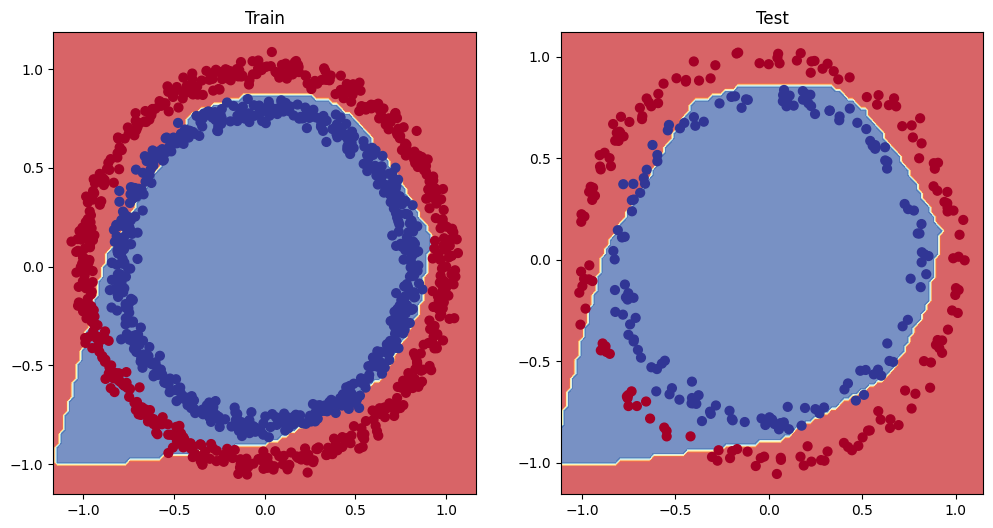

In [237]:
# Plot decision boundaries for training and test sets
from helper_functions import plot_predictions, plot_decision_boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_cc, X_train, Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_cc, X_test, Y_test)

In [238]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "02_pytorch_circles_classification_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_cc.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/02_pytorch_circles_classification_model.pth


In [ ]:
loaded_modelcc2 = CircleClassification()
loaded_modelcc2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))